# Stock Logistic Regression

In [1]:
# Library
import pandas as pd
import numpy as np
import math

# Plot Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
stock_name = 'AMD'
start = '2010-01-01' 
end = '2018-09-27'
df = yf.download(stock_name, start, end)
df = df.reset_index()

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,9.79,9.90,9.68,9.70,9.70,18748700
1,2010-01-05,9.71,9.90,9.68,9.71,9.71,22145700
2,2010-01-06,9.68,9.76,9.55,9.57,9.57,18643400
3,2010-01-07,9.51,9.55,9.18,9.47,9.47,26806800
4,2010-01-08,9.37,9.47,9.29,9.43,9.43,13752800


In [4]:
df.groupby('Adj Close').mean()

,Open,High,Low,Close,Volume
Adj Close,,,,,
1.620000,1.670000,1.700000,1.610000,1.620000,1.191650e+07
1.660000,1.755000,1.760000,1.660000,1.660000,8.895400e+06
1.670000,1.715000,1.730000,1.650000,1.670000,1.174185e+07
1.700000,1.775000,1.790000,1.695000,1.700000,1.169745e+07
1.710000,1.760000,1.785000,1.695000,1.710000,7.057650e+06
1.720000,1.690000,1.726667,1.666667,1.720000,9.223667e+06
1.730000,1.800000,1.840000,1.720000,1.730000,9.975200e+06
1.740000,1.770000,1.770000,1.720000,1.740000,5.531700e+06
1.750000,1.690000,1.830000,1.650000,1.750000,1.721740e+07


Text(0,0.5,'Frequency')

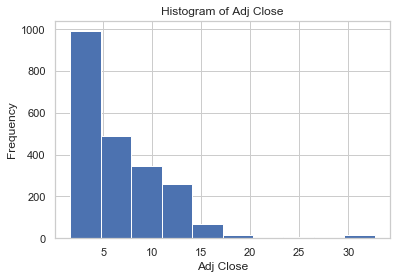

In [5]:
df['Adj Close'].hist()
plt.title('Histogram of Adj Close')
plt.xlabel('Adj Close')
plt.ylabel('Frequency')

In [6]:
df = df.drop(['Date'], axis=1)

In [7]:
X = df.loc[:, df.columns != 'Adj Close']
y = np.where (df['Adj Close'].shift(-1) > df['Adj Close'],1,-1)

split = int(0.7*len(df))

X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [8]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

In [9]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Open,[-1.16225384009e-15]
1,High,[-1.1725923238e-15]
2,Low,[-1.15026223986e-15]
3,Close,[-1.16249007296e-15]
4,Volume,[-3.05621989828e-09]


In [10]:
probability = model.predict_proba(X_test)

print(probability)

[[ 0.51051964  0.48948036]
 [ 0.50826892  0.49173108]
 [ 0.5059472   0.4940528 ]
 ..., 
 [ 0.58961562  0.41038438]
 [ 0.56033033  0.43966967]
 [ 0.56678524  0.43321476]]


In [11]:
predicted = model.predict(X_test)

In [12]:
print(metrics.confusion_matrix(y_test, predicted))

[[308   0]
 [352   0]]


In [13]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.47      1.00      0.64       308
           1       0.00      0.00      0.00       352

   micro avg       0.47      0.47      0.47       660
   macro avg       0.23      0.50      0.32       660
weighted avg       0.22      0.47      0.30       660



In [14]:
print(model.score(X_test,y_test))

0.466666666667


In [15]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[ 0.48868778  0.51131222  0.50909091  0.50909091  0.49090909  0.50909091
  0.50909091  0.50909091  0.48858447  0.48858447]
0.501353258614


In [16]:
from sklearn.feature_selection import RFE

# X = np.array(df[['Open', 'High', 'Low', 'Volume']].values)
# y = np.array(df['Adj Close'].values)

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


Different Method of Logistic Regression

In [17]:
stock_name = 'AMD'
start = '2010-01-01' 
end = '2018-09-27'
df = yf.download(stock_name, start, end)
df = df.reset_index()
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,9.79,9.90,9.68,9.70,9.70,18748700
1,2010-01-05,9.71,9.90,9.68,9.71,9.71,22145700
2,2010-01-06,9.68,9.76,9.55,9.57,9.57,18643400
3,2010-01-07,9.51,9.55,9.18,9.47,9.47,26806800
4,2010-01-08,9.37,9.47,9.29,9.43,9.43,13752800


In [18]:
df = df.drop(['Date'], axis=1)

In [19]:
#X = df[['Open', 'High', 'Low', 'Volume']].values
#y = df['Adj Close'].values
X = df.loc[:, df.columns != 'Adj Close']
y = np.where (df['Adj Close'].shift(-1) > df['Adj Close'],1,-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [21]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Open,[8.15298772072e-17]
1,High,[8.34788176473e-17]
2,Low,[7.87561154695e-17]
3,Close,[7.91884692417e-17]
4,Volume,[1.55636449209e-11]


In [22]:
probability = model.predict_proba(X_test)

print(probability)

[[ 0.49997258  0.50002742]
 [ 0.49996825  0.50003175]
 [ 0.4999585   0.5000415 ]
 ..., 
 [ 0.49994353  0.50005647]
 [ 0.49970723  0.50029277]
 [ 0.49989784  0.50010216]]


In [23]:
predicted = model.predict(X_test)

In [24]:
print(metrics.confusion_matrix(y_test, predicted))

[[  0 352]
 [  0 308]]


In [25]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       352
           1       0.47      1.00      0.64       308

   micro avg       0.47      0.47      0.47       660
   macro avg       0.23      0.50      0.32       660
weighted avg       0.22      0.47      0.30       660



In [26]:
print(model.score(X_test,y_test))

0.466666666667


In [27]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[ 0.48868778  0.51131222  0.50909091  0.50909091  0.49090909  0.50909091
  0.50909091  0.50909091  0.48858447  0.48858447]
0.501353258614


In [28]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


Different Method of Logistic Regression

In [29]:
stock_name = 'AMD'
start = '2010-01-01' 
end = '2018-09-27'
df = yf.download(stock_name, start, end)
df = df.reset_index()
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,9.79,9.90,9.68,9.70,9.70,18748700
1,2010-01-05,9.71,9.90,9.68,9.71,9.71,22145700
2,2010-01-06,9.68,9.76,9.55,9.57,9.57,18643400
3,2010-01-07,9.51,9.55,9.18,9.47,9.47,26806800
4,2010-01-08,9.37,9.47,9.29,9.43,9.43,13752800


In [30]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2.200000e+03
mean,6.725291,6.862077,6.584586,6.724877,6.724877,3.242892e+07
std,4.546764,4.658969,4.440715,4.560555,4.560555,3.115767e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,3.340000,3.397500,3.290000,3.330000,3.330000,1.395668e+07
50%,5.755000,5.870000,5.675000,5.760000,5.760000,2.238215e+07
75%,8.772500,8.950000,8.615000,8.800000,8.800000,3.880502e+07
max,33.180000,34.139999,32.189999,32.720001,32.720001,3.250584e+08


In [31]:
X = df.ix[:,(1,2,3,6)].values
y = np.where (df['Adj Close'].shift(-1) > df['Adj Close'],1,-1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [33]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = LogReg.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[  0, 345],
       [  0, 315]], dtype=int64)

In [36]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       345
           1       0.48      1.00      0.65       315

   micro avg       0.48      0.48      0.48       660
   macro avg       0.24      0.50      0.32       660
weighted avg       0.23      0.48      0.31       660



In [37]:
print(LogReg.predict(X_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [38]:
X_test

array([[  4.01000000e+00,   4.02000000e+00,   3.95000000e+00,
          1.12703000e+07],
       [  1.20300000e+01,   1.20400000e+01,   1.15800000e+01,
          8.96744000e+07],
       [  6.82000000e+00,   7.08000000e+00,   6.79000000e+00,
          2.89094000e+07],
       ..., 
       [  1.27600000e+01,   1.28900000e+01,   1.25400000e+01,
          5.88615000e+07],
       [  7.24000000e+00,   7.50000000e+00,   7.22000000e+00,
          2.12470000e+07],
       [  8.36000000e+00,   8.43000000e+00,   8.10000000e+00,
          2.29465000e+07]])

In [39]:
score = LogReg.score(X_test, y_test)
print(score)

0.477272727273


In [40]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[ 0.48868778  0.51131222  0.50909091  0.50909091  0.49090909  0.50909091
  0.50909091  0.50909091  0.48858447  0.48858447]
0.501353258614
